In [9]:
import pandas as pd

In [36]:
# Load the Data

file_path = r"D:\Projects\Optimizing Inventory and Delivery in a Retail Supply Chain\Online Retail.xlsx"

df = pd.read_excel(file_path)

In [37]:
## Initial Exploration

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [39]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [40]:

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Clean the Data

In [51]:
df = df[df['CustomerID'].notna()]
df = df[df['Quantity']> 0]
df = df[df['UnitPrice']> 0]

### Inventory Movement Analysis

In [52]:
# Convert InvoiceDate to proper datetime format

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Add a new column with just the date (no time)
df['Date'] = df['InvoiceDate'].dt.date

# Add a new column for the start of the week (e.g., Monday)

df['Week'] = df['InvoiceDate'].dt.to_period('W').dt.start_time


##### Group by StockCode and Date/Week

### Quantity Sold per Day:

In [53]:
daily_sales = df.groupby(['StockCode', 'Date'])['Quantity'].sum().reset_index()

### Quantity Sold per Week:

In [54]:
weekly_sales = df.groupby(['StockCode', 'Week'])['Quantity'].sum().reset_index()

##### Find Top and Bottom Moving Items

### Total Quantity Sold by Product:

In [55]:
product_sales = df.groupby(['StockCode'])['Quantity'].sum().reset_index()
product_sales = product_sales.sort_values(by = 'Quantity', ascending=False)

In [35]:
print(product_sales)

     StockCode  Quantity
1070     22197     56450
2622     84077     53847
3659    85099B     47363
3670    85123A     38830
2735     84879     36221
...        ...       ...
3283   79323LP     -2618
3286    79323W     -4838
3213    72140F     -5368
1828     23003     -8516
1830     23005    -14418

[4070 rows x 2 columns]


### Top 10 Moving Items:

In [57]:
top_movers = product_sales.head(10)

### Bottom 10 Moving Items (least sold):

In [58]:
bottom_movers = product_sales.tail(10)

### Plot the Results:

C:\Users\chandra-chennai\AppData\Local\Temp\ipykernel_24988\2489596549.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_movers['StockCode'] = top_movers['StockCode'].astype(str)


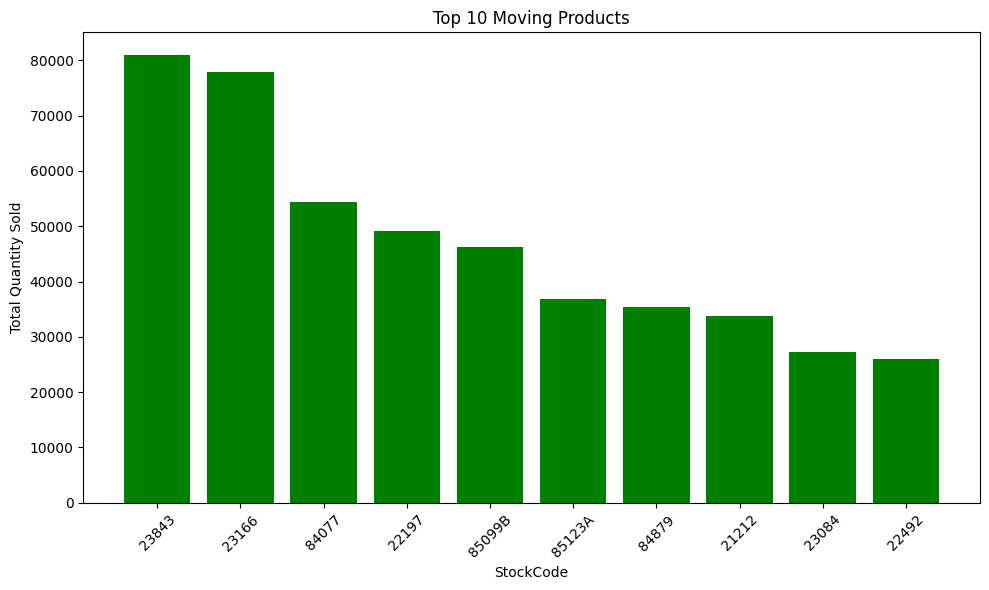

C:\Users\chandra-chennai\AppData\Local\Temp\ipykernel_24988\2489596549.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_movers['StockCode'] = bottom_movers['StockCode'].astype(str)


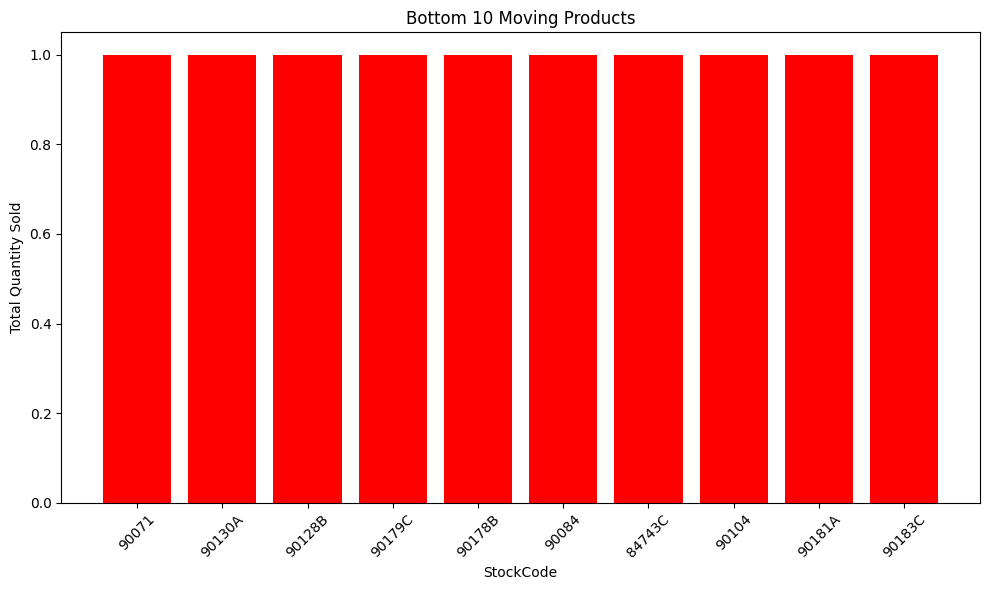

In [69]:
import matplotlib.pyplot as plt

# Top Movers
# Convert StockCode to string if it's not already
top_movers['StockCode'] = top_movers['StockCode'].astype(str)

# Plot bar chart without setting width manually
plt.figure(figsize=(10, 6))
plt.bar(top_movers['StockCode'], top_movers['Quantity'], color='green')

plt.title('Top 10 Moving Products')
plt.xlabel('StockCode')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Convert StockCode to string to avoid plotting issues
bottom_movers['StockCode'] = bottom_movers['StockCode'].astype(str)

# Bottom Movers Plot
plt.figure(figsize=(10, 6))
plt.bar(bottom_movers['StockCode'], bottom_movers['Quantity'], color='red')
plt.title('Bottom 10 Moving Products')
plt.xlabel('StockCode')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Warehouse Simulation

### Simulate assigning products to warehouses:

In [70]:
import numpy as np

# List of unique products
unique_products = df['StockCode'].unique()

# Assign each product randomly to a warehouse
warehouses = ['W1', 'W2', 'W3']
product_to_warehouse = {product: np.random.choice(warehouses) for product in unique_products}

# Create a new column in df with warehouse info
df['Warehouse'] = df['StockCode'].map(product_to_warehouse)


### Simulate Delivery Lag

In [71]:
# Random delivery delay between 1 to 5 days
df['DeliveryDays'] = np.random.randint(1, 6, size=len(df))

# Add delivery date
df['DeliveryDate'] = df['InvoiceDate'] + pd.to_timedelta(df['DeliveryDays'], unit='D')


### Calculate Key Metrics

In [72]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']


### Product-Level Sales Trends

In [73]:
product_sales = df.groupby('StockCode')['Revenue'].sum().sort_values(ascending=False).reset_index()


### Country-Wise Demand

In [75]:
country_demand = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).reset_index()

### Returns Analysis (if you still have negative quantities)

In [78]:
returns = df[df['Quantity'] < 0]
returns_by_product = returns.groupby('StockCode')['Quantity'].sum().reset_index()

## Warehouse Performance Analysis Ideas

### Total revenue per warehouse

In [79]:
warehouse_revenue = df.groupby('Warehouse')['Revenue'].sum().reset_index()

### Average delivery time per warehouse

In [80]:
warehouse_delivery_time = df.groupby('Warehouse')['DeliveryDays'].mean().reset_index()

### Revenue by Warehouse: 

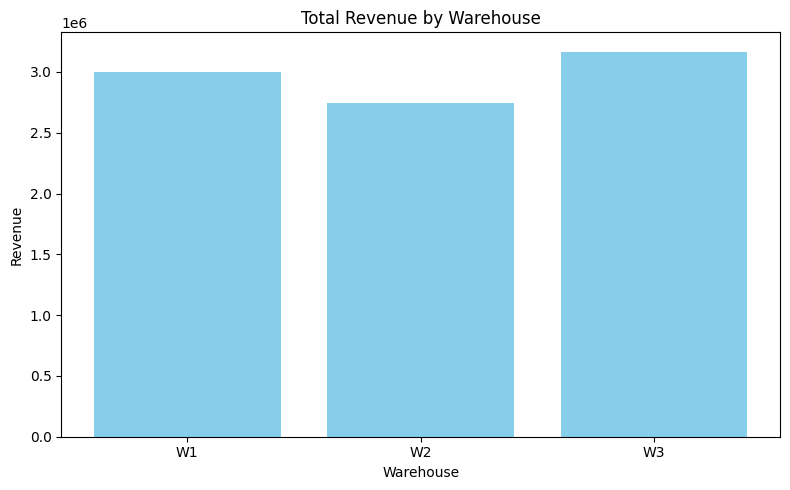

In [81]:
import matplotlib.pyplot as plt

# Group revenue by warehouse
warehouse_revenue = df.groupby('Warehouse')['Revenue'].sum().reset_index()

# Plot
plt.figure(figsize=(8, 5))
plt.bar(warehouse_revenue['Warehouse'], warehouse_revenue['Revenue'], color='skyblue')
plt.title('Total Revenue by Warehouse')
plt.xlabel('Warehouse')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()


### Top Products per Warehouse (Top 5)

C:\Users\chandra-chennai\AppData\Local\Temp\ipykernel_24988\3186073372.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_per_warehouse = top_products.groupby('Warehouse').apply(lambda x: x.nlargest(5, 'Revenue')).reset_index(drop=True)


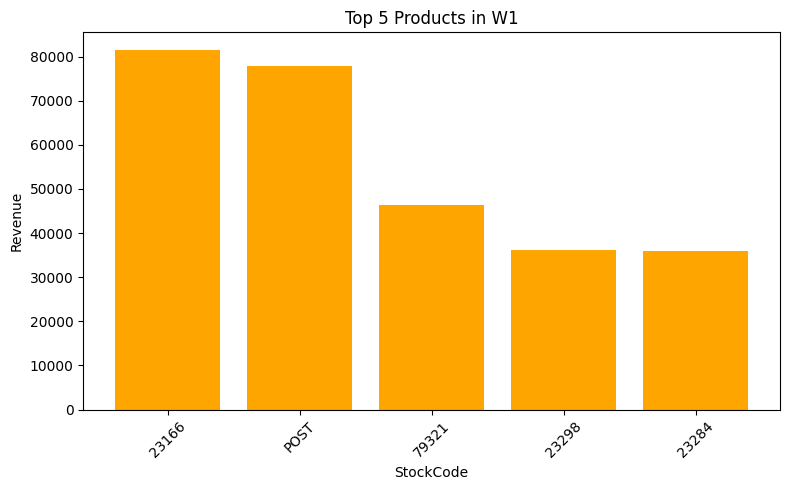

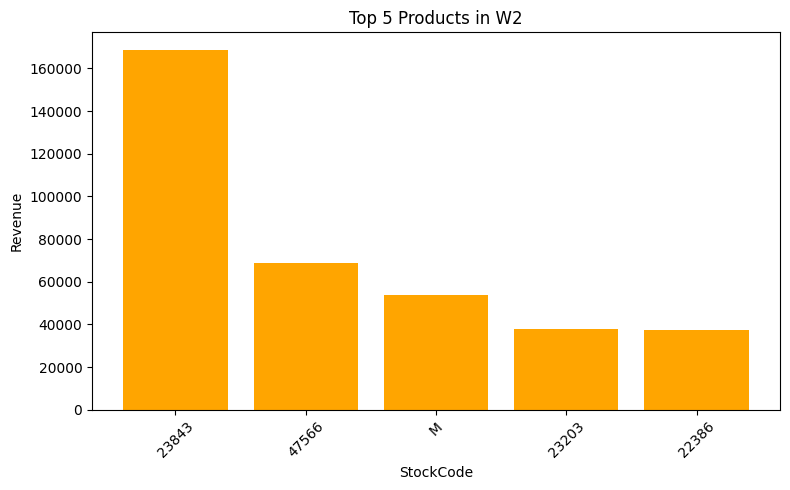

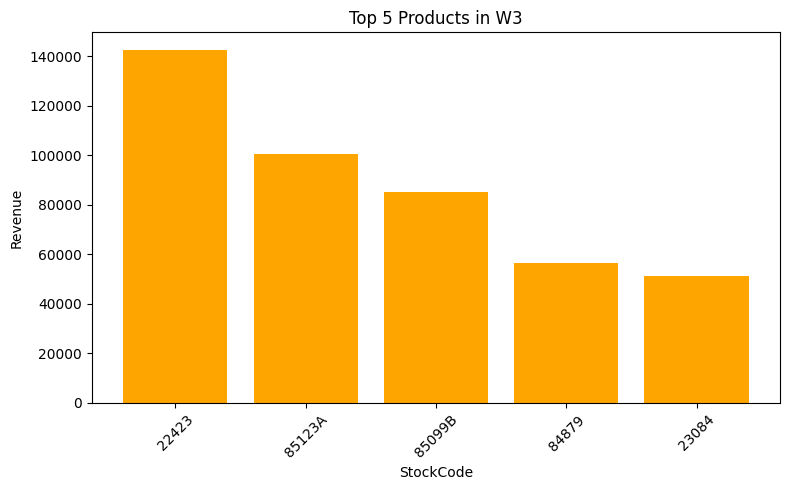

In [82]:
# Group by Warehouse and StockCode, sum revenue
top_products = df.groupby(['Warehouse', 'StockCode'])['Revenue'].sum().reset_index()

# Get top 5 per warehouse
top5_per_warehouse = top_products.groupby('Warehouse').apply(lambda x: x.nlargest(5, 'Revenue')).reset_index(drop=True)

# Optional: Plot per warehouse
for warehouse in top5_per_warehouse['Warehouse'].unique():
    data = top5_per_warehouse[top5_per_warehouse['Warehouse'] == warehouse]
    
    plt.figure(figsize=(8, 5))
    plt.bar(data['StockCode'].astype(str), data['Revenue'], color='orange')
    plt.title(f'Top 5 Products in {warehouse}')
    plt.xlabel('StockCode')
    plt.ylabel('Revenue')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Delivery Speed Comparison by Warehouse

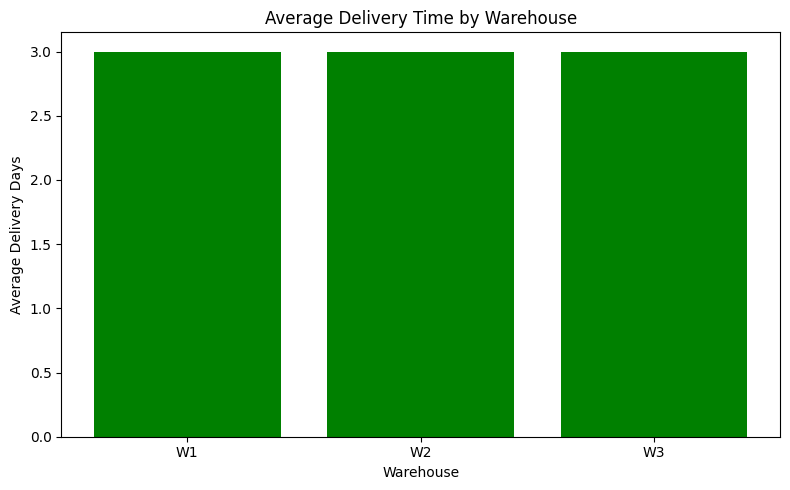

In [83]:
# Average delivery days per warehouse
delivery_speed = df.groupby('Warehouse')['DeliveryDays'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
plt.bar(delivery_speed['Warehouse'], delivery_speed['DeliveryDays'], color='green')
plt.title('Average Delivery Time by Warehouse')
plt.xlabel('Warehouse')
plt.ylabel('Average Delivery Days')
plt.tight_layout()
plt.show()


### Export to Excel

In [84]:
# Export warehouse revenue
warehouse_revenue.to_excel('warehouse_revenue.xlsx', index=False)

# Export top 5 products per warehouse
top5_per_warehouse.to_excel('top5_products_per_warehouse.xlsx', index=False)

# Export average delivery speed
delivery_speed.to_excel('warehouse_delivery_speed.xlsx', index=False)
